 Name: Sushma S

#  Daily Returns Analysis

## a) Calculate the daily gain for the stocks.

In [7]:
import pandas as pd
import numpy as np
import seaborn as sn
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
#reading the DLF Ltd daily prices from csv and set Date column as index
dlf_df = pd.read_csv( '../data/DLFLtd.csv' )
dlf_df = dlf_df.set_index(pd.DatetimeIndex(dlf_df['Date']) )

#reading the Dabur India Ltd daily prices and set Date column as index
dabur_df = pd.read_csv( '../data/DaburIndiaLtd.csv' )
dabur_df = dabur_df.set_index(pd.DatetimeIndex(dabur_df['Date']) )

#reading the 3M India Ltd daily prices and set Date column as index
threeM_df = pd.read_csv( '../data/3MIndiaLtd.csv' )
threeM_df = threeM_df.set_index(pd.DatetimeIndex(threeM_df['Date']) )

#reading the Titan Company Ltd daily prices and set Date column as index
titan_df = pd.read_csv( '../data/TitanCompanyLtd.csv' )
titan_df = titan_df.set_index(pd.DatetimeIndex(titan_df['Date']) )

In [9]:
#As yesterday's close price is same as today's open price, to calculate gain -> (Today's Open Price - Today's Close price)/Today's Open price
dlf_df["gain"] = dlf_df.apply( lambda rec: round( ( rec['Yesterdays Close Price'] - rec['Close Price'] ) / rec['Yesterdays Close Price'], 2 ), axis = 1 )

dabur_df["gain"] = dabur_df.apply( lambda rec: round( (rec['Yesterdays Close Price'] - rec['Close Price']) / rec['Yesterdays Close Price'], 2 ), axis = 1 )

threeM_df["gain"] = threeM_df.apply( lambda rec: round( ( rec['Yesterdays Close Price'] - rec['Close Price']) / rec['Yesterdays Close Price'], 2 ), axis = 1 )

titan_df["gain"] = titan_df.apply( lambda rec: round( ( rec['Yesterdays Close Price'] - rec['Close Price']) / rec['Yesterdays Close Price'], 2 ), axis = 1 )

In [10]:
dlf_df.head(5)

,Date,Open Price,High Price,Low Price,Close Price,WAP,No.of Shares,No. of Trades,Total Turnover (Rs.),Deliverable Quantity,% Deli. Qty to Traded Qty,Spread High-Low,Spread Close-Open,Yesterdays Close Price,gain
Date,,,,,,,,,,,,,,,
2012-04-02,2-Apr-12,201.00,209.20,200.25,207.3,206.709448,1028861,14144,212675289,170280.0,16.55,8.95,6.30,201.0,-0.03
2012-04-03,3-Apr-12,209.50,210.95,206.15,207.0,208.479581,630615,8132,131470351,97668.0,15.49,4.80,-2.50,207.3,0.00
2012-04-04,4-Apr-12,207.00,207.00,201.20,204.2,203.683239,632284,7807,128785653,50993.0,8.06,5.80,-2.80,207.0,0.01
2012-04-09,9-Apr-12,202.00,207.70,201.15,205.5,205.538726,765619,10538,157364354,68847.0,8.99,6.55,3.50,204.2,-0.01
2012-04-10,10-Apr-12,206.75,207.20,202.00,204.2,204.758825,505360,7423,103476920,42197.0,8.35,5.20,-2.55,205.5,0.01


#####  Conclusion - A new column 'gain' is added to all the stocks data frame

## b) Calculate the mean and variance of the percentage daily returns?

In [11]:
# mean and variance of dlf
mean = dlf_df.gain.mean()
var = dlf_df.gain.var()
print("For DLF percentage daily return, \n mean:", mean, " \n variance:", var, "\n" )

For DLF percentage daily return, 
 mean: -0.0002179176755447943  
 variance: 0.00100358736851987 



In [12]:
# mean and variance of dabur
mean = dabur_df.gain.mean()
var = dabur_df.gain.var()
print("For Dabur percentage daily return, \n mean:", mean, " \n variance:", var, "\n" )

For Dabur percentage daily return, 
 mean: -0.0010096930533117937  
 variance: 0.00023333701187013822 



In [13]:
# mean and variance of 3M
mean = threeM_df.gain.mean()
var = threeM_df.gain.var()
print("For 3M percentage daily return, \n mean:", mean, " \n variance:", var, "\n" )

For 3M percentage daily return, 
 mean: -0.0010615883306320907  
 variance: 0.00036894510891068 



In [14]:
# mean and variance of Titan
mean = titan_df.gain.mean()
var = titan_df.gain.var()
print("For Titan percentage daily return, \n mean:", mean, " \n variance:", var, "\n" )

For Titan percentage daily return, 
 mean: -0.0008158319870759285  
 variance: 0.00042253517355946344 



## c) Which stock has highest volatility? Draw the distribution of daily returns for all stock in one plot.

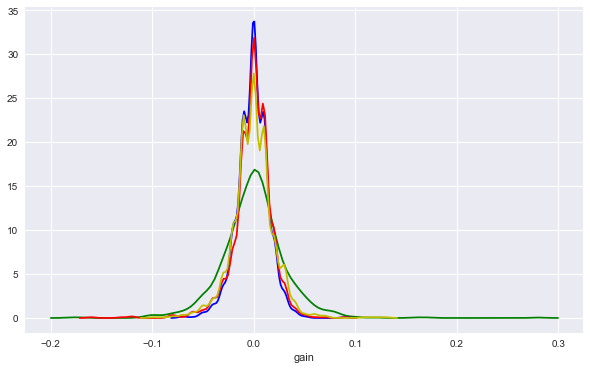

In [15]:
sn.set(rc={"figure.figsize": (10, 6)});
sn.distplot( dlf_df.gain, hist = False, color = 'g' )
sn.distplot( dabur_df.gain, hist = False, color = 'b' )
sn.distplot( threeM_df.gain, hist = False, color = 'r' )
sn.distplot( titan_df.gain, hist = False, color = 'y' )

#### Conclusion : DLF Ltd stocks have highest variance compared to other stocks, which implies it has highest volatility.

## d) Are the percentage daily returns of these stocks correlated? Compute the correlations between the daily returns of the above 4 stocks and draw a heatmap.

In [16]:
#merge dlf and dabur dataframes on 'Date' to form a new dataframe containing Date, gain_dlf and gain_dabur
dlf_dabur_df = dlf_df[['Date', 'gain']].merge(
  dabur_df[['Date', 'gain']],
  on = ['Date'],
  suffixes=('_dlf', '_dabur'), how = 'inner' )

In [17]:
#merge threeM with dlf_dabur dataframe on 'Date' to form a new dataframe containing Date, gain_dlf, gain_dabur and gain from threeM
dlf_dabur_threeM_df = dlf_dabur_df.merge(
  threeM_df[['Date', 'gain']],
  on = ['Date'], how = 'inner' )

In [18]:
#merge titan with dlf_dabur_threeM dataframe on 'Date' to form all_df containing Date, gain_dlf, gain_dabur, gain_threeM and gain_titan
all_df = dlf_dabur_threeM_df.merge(
  titan_df[['Date', 'gain']], suffixes=('_threeM', '_titan'),
  on = ['Date'], how = 'inner' )

In [19]:
#view the first five rows of all_df
all_df[0:5]

,Date,gain_dlf,gain_dabur,gain_threeM,gain_titan
0,2-Apr-12,-0.03,0.01,-0.01,-0.05
1,3-Apr-12,0.00,0.00,-0.07,-0.02
2,4-Apr-12,0.01,0.00,-0.00,-0.01
3,9-Apr-12,-0.01,0.01,-0.04,0.02
4,10-Apr-12,0.01,-0.01,-0.01,-0.00


In [20]:
#create correlation matrix of all_df
all_df.corr()

,gain_dlf,gain_dabur,gain_threeM,gain_titan
gain_dlf,1.000000,0.170479,0.231348,0.229502
gain_dabur,0.170479,1.000000,0.218296,0.236206
gain_threeM,0.231348,0.218296,1.000000,0.165007
gain_titan,0.229502,0.236206,0.165007,1.000000


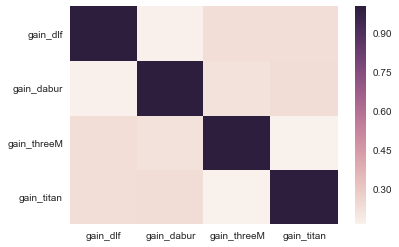

In [21]:
#draw heatmap to view correlation of the four stocks
sn.set(rc={"figure.figsize": (6, 4)});
sn.heatmap( all_df.corr() )

#### Conclusion: Dabur India Ltd and Titan Company Ltd are highly correlated when compared to other stocks. That means there is a higher chance that if Dabur stocks gain, the Titan stocks will also gain. Similiarily if one stock loses there is a higher chance that the other stock will also lose.

## Question 2 - Monthly Returns Analysis

## a) Calculate the mean and variance of percentage monthly returns?

In [22]:
dlf_mon_df = dlf_df.resample('M').mean()
dabur_mon_df = dabur_df.resample('M').mean()
threeM_mon_df = threeM_df.resample('M').mean()
titan_mon_df = titan_df.resample('M').mean()

In [23]:
#Retain Date column in the dataframe
dlf_mon_df['Date'] = dlf_mon_df.index
dabur_mon_df['Date'] = dabur_mon_df.index
threeM_mon_df['Date'] = threeM_mon_df.index
titan_mon_df['Date'] = titan_mon_df.index

In [24]:
# mean and variance of dlf
mean = dlf_mon_df.gain.mean()
var = dlf_mon_df.gain.var()
print("For DLF percentage monthy return, \n mean:", mean, " \n variance:", var, "\n" )

For DLF percentage monthy return, 
 mean: -0.00021922199548057644  
 variance: 4.642077959621732e-05 



In [25]:
# mean and variance of dabur
mean = dabur_mon_df.gain.mean()
var = dabur_mon_df.gain.var()
print("For Dabur percentage monthy return, \n mean:", mean, " \n variance:", var, "\n" )

For Dabur percentage monthy return, 
 mean: -0.0010360869785354908  
 variance: 6.990954978325018e-06 



In [26]:
# mean and variance of 3M
mean = threeM_mon_df.gain.mean()
var = threeM_mon_df.gain.var()
print("For 3M percentage monthy return, \n mean:", mean, " \n variance:", var, "\n" )

For 3M percentage monthy return, 
 mean: -0.0011000186841720024  
 variance: 1.7477469140588772e-05 



In [27]:
# mean and variance of Titan
mean = titan_mon_df.gain.mean()
var = titan_mon_df.gain.var()
print("For Titan percentage monthy return, \n mean:", mean, " \n variance:", var, "\n" )

For Titan percentage monthy return, 
 mean: -0.0008069655088533809  
 variance: 2.1500141636509346e-05 



## b) Which stock has highest volatility as far as monthly returns is concerned? Draw the box‐plot of monthly returns for all stock in one plot.

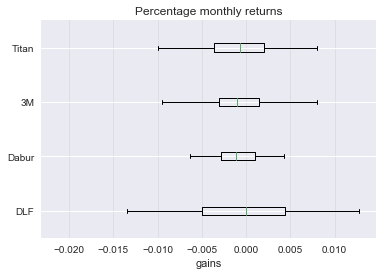

In [28]:
stocks = [dlf_mon_df, dabur_mon_df, threeM_mon_df, titan_mon_df]
names = ['DLF', 'Dabur', '3M', 'Titan']

fig, ax = plt.subplots(sharex=True)
# Add a horizontal grid to the plot
ax.xaxis.grid(True, linestyle='-', which='major', color='lightgrey', alpha=0.5)
ax.set_axisbelow(True)
ax.set_title('Percentage monthly returns')

for i,l in enumerate(stocks):
    ax.boxplot(l.gain, vert=False, positions = [i])

ax.set_yticks(range(len(stocks)))
ax.set_yticklabels(names)
ax.set_xlabel("gains")

ax.set_ylim(-0.5, len(stocks)-0.5)

plt.show()

#### Conclusion: DLF has a larger InterQuartileRange compared to the rest (closely followed by Titan). Hence DLF has the highest volatility.

## c) Which stock has highest probability of giving a return (monthly) of 2% or more?

In [29]:
#DLF ltd
1 - stats.norm.cdf( 0.02,
             loc=dlf_mon_df.gain.mean(),
             scale=dlf_mon_df.gain.std())

0.0015005776617307287

In [30]:
#Dabur India Ltd
1 - stats.norm.cdf( 0.02,
             loc=dabur_mon_df.gain.mean(),
             scale=dabur_mon_df.gain.std())

8.8817841970012523e-16

In [31]:
#3M India Ltd
1 - stats.norm.cdf( 0.02,
             loc=threeM_mon_df.gain.mean(),
             scale=threeM_mon_df.gain.std())

2.2426068635450491e-07

In [32]:
#Titan Company Ltd
1 - stats.norm.cdf( 0.02,
             loc=titan_mon_df.gain.mean(),
             scale=titan_mon_df.gain.std())

3.6060523197489758e-06

#### Conclusion: DLF ltd has the highest probability of 0.15% of giving a return of 2% or more

## d) Which stock has highest probability of making a loss (monthly) of 2% or more?

In [33]:
from scipy import stats
#DLF ltd
stats.norm.cdf( -0.02,
             loc=dlf_mon_df.gain.mean(),
             scale=dlf_mon_df.gain.std())

0.0018464512917959308

In [34]:
#Dabur India Ltd
stats.norm.cdf( -0.02,
             loc=dabur_mon_df.gain.mean(),
             scale=dabur_mon_df.gain.std())

3.6868469677979768e-13

In [35]:
#3M India Ltd
stats.norm.cdf( -0.02,
             loc=threeM_mon_df.gain.mean(),
             scale=threeM_mon_df.gain.std())

3.0792873477194188e-06

In [36]:
#Titan Company Ltd
stats.norm.cdf( -0.02,
             loc=titan_mon_df.gain.mean(),
             scale=titan_mon_df.gain.std())

1.7421194422774455e-05

#### Conclusion: DLF has the highest probability of 0.184% of making a loss of 2% or more

## Question 3 - Portfolio Analysis

## a) Average monthly returns of the portfolio and variance of monthly returns of the portfolio?

In [37]:
#Weights of each stock is as below
dlf_wt = 0.25
dabur_wt = 0.25
threeM_wt = 0.25
titan_wt = 0.25

In [38]:
#Function to calculate average monthly returns of a portfolio
def avg_monthly_returns(weights,gains):
    avg_mon_return=0
    for x in range(len(weights)):
        avg_mon_return += weights[x]*gains[x]
    return avg_mon_return

In [39]:
#Create list of weights and gains of all the stocks
weights = [dlf_wt, dabur_wt, threeM_wt, titan_wt]
gains = [dlf_mon_df.gain.mean(), dabur_mon_df.gain.mean(), threeM_mon_df.gain.mean(), titan_mon_df.gain.mean()]

#Average monthly return of the portfolio is calculated as below
avg_mon_return = avg_monthly_returns(weights, gains)
print("Average monthly return of the portfolio: ", avg_mon_return, "\n") 

Average monthly return of the portfolio:  -0.0007905732917603625 



In [40]:
#Variance of monthly return of the portfolio is calculated using the formula - W'_p * S * W_p where,
#W'_p = transpose of vector of weights of stocks in portfolios
#S = sample covariance matrix
#W_p = vector of weights of stocks in portfolios

#create weights np array
weights_np = np.array([[dlf_wt, dabur_wt, threeM_wt, titan_wt]])



In [41]:
#find the covariance of monthly returns of the portfolio
#merge dlf and dabur dataframes on 'Date' to form a new dataframe containing Date, gain_dlf and gain_dabur
dlf_dabur_mon_df = dlf_mon_df[['Date', 'gain']].merge(
  dabur_mon_df[['Date', 'gain']],
  on = ['Date'],
  suffixes=('_dlf', '_dabur'), how = 'inner' )

In [42]:
#merge threeM with dlf_dabur dataframe on 'Date' to form a new dataframe containing Date, gain_dlf, gain_dabur and gain from threeM
dlf_dabur_threeM_mon_df = dlf_dabur_mon_df.merge(
  threeM_mon_df[['Date', 'gain']],
  on = ['Date'], how = 'inner' )

In [43]:
#merge titan with dlf_dabur_threeM dataframe on 'Date' to form all_df containing Date, gain_dlf, gain_dabur, gain_threeM and gain_titan
all_mon_df = dlf_dabur_threeM_mon_df.merge(
  titan_mon_df[['Date', 'gain']], suffixes=('_threeM', '_titan'),
  on = ['Date'], how = 'inner' )

In [44]:
#create covariance matrix
covar_matrix = np.array(all_mon_df.cov())
covar_matrix

array([[  4.64207796e-05,   4.74959930e-06,   6.21801520e-06,
          1.09138575e-05],
       [  4.74959930e-06,   6.99095498e-06,   3.72610404e-06,
          2.71234246e-06],
       [  6.21801520e-06,   3.72610404e-06,   1.74774691e-05,
          6.48639314e-06],
       [  1.09138575e-05,   2.71234246e-06,   6.48639314e-06,
          2.15001416e-05]])

In [45]:
#function to find the variance of monthly returns of the portfolio
def variance_monthly_returns(weights_np):
    return  np.dot(weights_np,np.dot(covar_matrix,weights_np.T))[0][0]

In [46]:
#find the variance of monthly returns of the portfolio

variance_mon_returns = variance_monthly_returns(weights_np)
print( "Variance of monthly returns of the portfolio: " , variance_mon_returns, "\n")

Variance of monthly returns of the portfolio:  1.01251230397e-05 



#### Conclusion: For the monthly returns of the portfolio, average is -0.08% and variance is almost 0.

## b) If investment on an alternative instrument gives you an average return of 0.5% monthly. Is it wiser to invest in the alternative instrument or the equally weighted portfolio you created above? Can you verify if the above portfolio monthly returns are higher than 0.5%?

### Answer: As we see from the answer of previous question, average monthly returns of equally weighted portfolio is -0.08%, hence it is wise to invest on an alternative instrument which gives an average return of 0.5% monthly.

## c) Randomly change the weights of the stocks in the portfolio and check the average returns and the variance of the portfolio. Create at least 10 different weight combinations of stocks and calculate the monthly mean returns and variances of all combination of portfolios.

In [47]:
#function to create different weight combinations of stock which add up to 1
import random
def create_weights():
  wt =[]
  for i in range(3):
    wt.append(round(random.uniform(0, 1.0-sum(wt)),2))
  wt.append(round(1.0-sum(wt),2))
  return wt

In [48]:
#Creating 10 different weight combination of stocks and calculating average monthly returns and variance
weights = []
for i in range(10) :
    weights.append(create_weights())
    print("Avg and variance details for weights", weights[i], "\n")
    avg_mon_return = avg_monthly_returns(weights[i], gains)
    print("Average monthly return of the portfolio: ", avg_mon_return, "\n") 
    variance_mon_returns = variance_monthly_returns(np.array([weights[i]]))
    print( "Variance of monthly returns of the portfolio: " , variance_mon_returns, "\n")
    print("\n")

Avg and variance details for weights [0.96, 0.0, 0.01, 0.03] 

Average monthly return of the portfolio:  -0.0002456622677686748 

Variance of monthly returns of the portfolio:  4.35544042701e-05 



Avg and variance details for weights [0.97, 0.02, 0.01, 0.0] 

Average monthly return of the portfolio:  -0.000244367262028589 

Variance of monthly returns of the portfolio:  4.39882600404e-05 



Avg and variance details for weights [0.9, 0.1, 0.0, 0.0] 

Average monthly return of the portfolio:  -0.0003009084937860679 

Variance of monthly returns of the portfolio:  3.85256688972e-05 



Avg and variance details for weights [0.53, 0.21, 0.14, 0.12] 

Average monthly return of the portfolio:  -0.0005846043999436446 

Variance of monthly returns of the portfolio:  1.79420552596e-05 



Avg and variance details for weights [0.97, 0.02, 0.0, 0.01] 

Average monthly return of the portfolio:  -0.00024143673027540274 

Variance of monthly returns of the portfolio:  4.40793561437e-05 



Avg and

## d) Create a dataframe where the stocks weight, mean and variances of all possible portfolio combinations are stored.

In [49]:
#Creating a dataframe with below columns

columns = ['DLF_weight', 'Dabur_weight', '3M_weight', 'Titan_weight', 'mean_return', 'std_returns']


In [50]:
#Adding data for 20 possible combination of weights of 4 stocks to the portfolio dataframe
data = []
for i in range(20) :
    weights.append(create_weights())
    avg_mon_return = avg_monthly_returns(weights[i], gains)
    variance_mon_returns = variance_monthly_returns(np.array([weights[i]])).item()
    row_data = weights[i] + [avg_mon_return, variance_mon_returns ]
    data.append(row_data)

portfolio_df = pd.DataFrame(columns= columns, data=data)
portfolio_df 


,DLF_weight,Dabur_weight,3M_weight,Titan_weight,mean_return,std_returns
0,0.96,0.00,0.01,0.03,-0.000246,0.000044
1,0.97,0.02,0.01,0.00,-0.000244,0.000044
2,0.90,0.10,0.00,0.00,-0.000301,0.000039
3,0.53,0.21,0.14,0.12,-0.000585,0.000018
4,0.97,0.02,0.00,0.01,-0.000241,0.000044
5,0.48,0.17,0.21,0.14,-0.000625,0.000016
6,0.52,0.23,0.02,0.23,-0.000560,0.000018
7,0.81,0.03,0.15,0.01,-0.000382,0.000033
8,0.83,0.07,0.07,0.03,-0.000356,0.000034
9,0.20,0.56,0.06,0.18,-0.000835,0.000008


## e) Plot the mean and variance of monthly returns of different portfolio combination on a scatter plot. Please explain your observations.

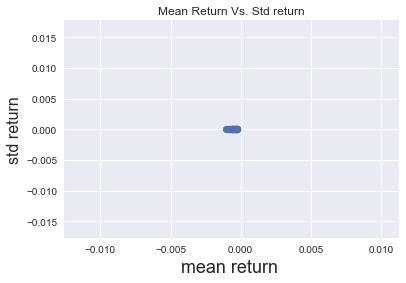

In [51]:
# creating a scatter plot
fig = plt.figure()
plt.scatter( portfolio_df.mean_return, portfolio_df.std_returns)
plt.title("Mean Return Vs. Std return")
plt.xlabel('mean return ', fontsize=18)
plt.ylabel('std return', fontsize=16)

#### Conclusion: All the points are concentrated in a single region with almost 0 variance and a slightly negative mean close to 0. This shows that the portfolio is least volatile and not very profitable